In [1]:
%config Completer.use_jedi = False


# Animated histogram

In [13]:
from utils import arrayify, mean_with_err
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

In [2]:
import pickle
with open("dumps/32x32-rangeMT-rand-1e7steps.pkl","rb") as f:
    results = pickle.load(f)
with open("dumps/32x32-rangeMT-rand-1e7steps-v2.pkl","rb") as f:
    results += pickle.load(f)

len(results)

Ts = np.array([T for T, _, M, _, E, _ in results])
meanMs = np.array([M[-3] for T, _, M, _, E, _ in results])

In [4]:
N=M=32
meanMs = []
errMs = []
lastMs = []
Ts = []
freq = 100
for i,(T,_,Ms, Es) in enumerate(results):    
    mean, err = mean_with_err(Ms[-Ms.shape[0]//3:])
    meanMs.append(mean)
    lastMs.append(np.mean(Ms[-100:]))
    
    errMs.append(err)
    Ts.append(T)

Ts, meanMs, errMs, lastMs = arrayify(Ts, meanMs, errMs, lastMs)

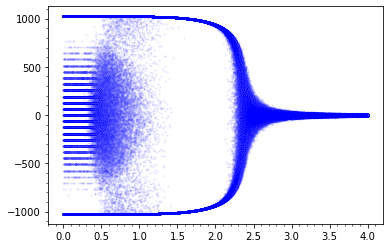

In [20]:
plt.scatter(Ts, (meanMs), s=1, marker="o", c="white", edgecolors="blue", alpha=0.1)
plt.minorticks_on()

In [35]:
n_bins = 50

In [36]:
# histogram our data with numpy
l_range, r_range = int(meanMs.min()),int(meanMs.max())
n, bins = np.histogram(np.linspace(l_range, r_range, 10*(r_range-l_range)),
                       n_bins, range=(l_range, r_range), density=1)
# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

In [37]:
nverts = nrects * (1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

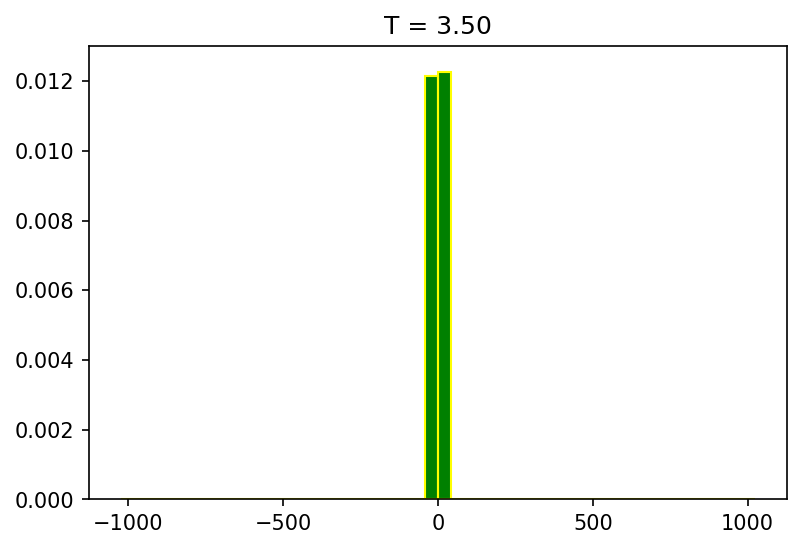

In [41]:
fig = plt.figure(dpi=150)
ax = plt.gca()
barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=1)
ax.add_patch(patch)

ax.set_xlim(left[0]*1.1, right[-1]*1.1)
# ax.set_ylim(bottom.min(), top.max()*14)
ax.set_ylim(bottom.min(), 0.013)

n_frames = 1000
T1s = np.linspace(0, 3.5, n_frames)[::-1]

dT = 0.1

def animate(i):
    print(i, end="\r")
    # simulate new data coming in
    T1 = T1s[i]
    
    ax.set_title(f"T = {T1:0.2f}") 

    
    data = meanMs[(T1-dT < Ts) & (T1+dT > Ts)]
    n, bins = np.histogram(data, n_bins, range=(l_range, r_range), density=1)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top


#     plt.gca().set_ylim(bottom.min(), top.max())
    return [patch, ]

anim = animation.FuncAnimation(fig, animate, n_frames, repeat=False, blit=True, interval=50)
plt.show()

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())